In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import sys
sys.path.append('/mnt/sdb1/ownCloud/Workspaces/Eclipse/dataAnalysis/Sleep-current/src/')

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as pl
import pickle as pkl
import fnmatch,os
import itertools
import statsmodels.formula.api as sm
from scipy.stats import pearsonr,ttest_ind,ranksums,linregress,ks_2samp,entropy,mannwhitneyu,spearmanr,wilcoxon
import pandas as pd
import seaborn as sns
from signale.tools import locate

/mnt/sdb1/softwares/anaconda2/envs/caiman/lib/python2.7/site-packages/NeuroTools/analysis.py:34: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/mnt/sdb1/softwares/anaconda2/envs/caiman/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/mnt/sdb1/softwares/anaconda2/envs/caiman/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/mnt/sdb1/softwares/anaconda2/envs/caiman/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/mnt/sdb1/softwares/anaconda2/envs/caiman/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app

In [26]:
lesTh  =  ['/mnt/sdb1/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/PCA_MEC/DATA_REV/Rat3656-D1.db-theta-vis.lsn',
            '/mnt/sdb1/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/PCA_MEC/DATA_REV/Rat3754-D2.db-theta-vis.lsn',
            '/mnt/sdb1/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/PCA_MEC/DATA_REV/Rat3837-D1.db-theta-vis.lsn',
            '/mnt/sdb1/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/PCA_MEC/DATA_REV/Rat3838-D2.db-theta-vis.lsn',
            '/mnt/sdb1/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/PCA_MEC/DATA_REV/Rat3903-D1.db-theta-vis.lsn',
            '/mnt/sdb1/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/PCA_MEC/DATA_REV/Rat405-D1.db-100ms-vis.lsn']
cntTh  = ['/mnt/sdb1/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/PCA_MEC/DATA_REV/Rat3906-D2.db-theta-vis.cnt',
            '/mnt/sdb1/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/PCA_MEC/DATA_REV/Rat3839-D4.db-theta-vis.cnt',
            '/mnt/sdb1/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/PCA_MEC/DATA_REV/Rat3661-D3.db-theta-vis.cnt',
            '/mnt/sdb1/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/PCA_MEC/DATA_REV/Rat614-D1.db-theta-vis.cnt',
            '/mnt/sdb1/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/PCA_MEC/DATA_REV/Rat616-D1.db-theta-vis.cnt']
##############################################################################
###Theta
lesThPre = np.array([])
lesThImm = np.array([])
lesThPost = np.array([])
for item in lesTh:
    lesThPre  = np.append(lesThPre,pkl.load(open(item,'rb'))[0])
    lesThImm  = np.append(lesThImm,pkl.load(open(item,'rb'))[1])
    lesThPost = np.append(lesThPost,pkl.load(open(item,'rb'))[2])
##############################################################################
    cntThPre = np.array([])
cntThImm = np.array([])
cntThPost = np.array([])
for item in cntTh:
    cntThPre  = np.append(cntThPre,pkl.load(open(item,'rb'))[0])
    cntThImm  = np.append(cntThImm,pkl.load(open(item,'rb'))[1])
    cntThPost = np.append(cntThPost,pkl.load(open(item,'rb'))[2])

##############################################################################

In [5]:
shuffled_slopes = pkl.load(open('/mnt/sdb1/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/files/SlopesShuffled.pkl','rb'))
shuffled_gammas = pkl.load(open('/mnt/sdb1/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/files/GammaShuffled.pkl','rb'))

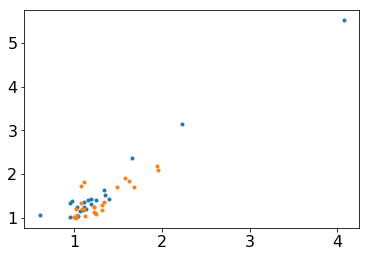

In [27]:
#pl.plot(shuffled_gammas[:1000,0],shuffled_gammas[:1000,1],'.')
pl.plot(cntThPre,cntThPost,'.')
pl.plot(lesThPre,lesThPost,'.')

In [28]:
print 'Control Gamma Tests'
print '===========PRE==============='
print ttest_ind(cntThPre,shuffled_gammas[:,0])
print ranksums(cntThPre,shuffled_gammas[:,0])
print mannwhitneyu(cntThPre,shuffled_gammas[:,0])

print '===========IMM==============='
print ttest_ind(cntThImm,shuffled_gammas[:,1])
print ranksums(cntThImm,shuffled_gammas[:,1])
print mannwhitneyu(cntThImm,shuffled_gammas[:,1])

print '===========POST==============='
print ttest_ind(cntThPost,shuffled_gammas[:,1])
print ranksums(cntThPost,shuffled_gammas[:,1])
print mannwhitneyu(cntThPost,shuffled_gammas[:,1])


Control Gamma Tests
===========PRE===============
Ttest_indResult(statistic=36.72568689507635, pvalue=8.1192777404166565e-294)
RanksumsResult(statistic=4.973544128437756, pvalue=6.5739800438306473e-07)
MannwhitneyuResult(statistic=529027.0, pvalue=3.2870375293213157e-07)
===========IMM===============
Ttest_indResult(statistic=106.19384068325577, pvalue=0.0)
RanksumsResult(statistic=6.3574871346622075, pvalue=2.0508084133974781e-10)
MannwhitneyuResult(statistic=281937.0, pvalue=1.0254228948947777e-10)
===========POST===============
Ttest_indResult(statistic=67.25892284911798, pvalue=0.0)
RanksumsResult(statistic=7.4961301777128915, pvalue=6.5729514089439358e-14)
MannwhitneyuResult(statistic=78643.0, pvalue=3.2865458850478383e-14)


In [29]:
print 'Lesion Gamma Tests'
print '===========PRE==============='
print ttest_ind(lesThPre,shuffled_gammas[:,0])
print ranksums(lesThPre,shuffled_gammas[:,0])
print mannwhitneyu(lesThPre,shuffled_gammas[:,0])

print '===========IMM==============='
print ttest_ind(lesThImm,shuffled_gammas[:,1])
print ranksums(lesThImm,shuffled_gammas[:,1])
print mannwhitneyu(lesThImm,shuffled_gammas[:,1])

print '===========POST==============='
print ttest_ind(lesThPost,shuffled_gammas[:,1])
print ranksums(lesThPost,shuffled_gammas[:,1])
print mannwhitneyu(lesThPost,shuffled_gammas[:,1])

Lesion Gamma Tests
===========PRE===============
Ttest_indResult(statistic=34.906095472924868, pvalue=9.2848820215996641e-266)
RanksumsResult(statistic=7.3856389017742359, pvalue=1.5172304893824283e-13)
MannwhitneyuResult(statistic=248141.0, pvalue=7.5862988014286697e-14)
===========IMM===============
Ttest_indResult(statistic=69.690396488301658, pvalue=0.0)
RanksumsResult(statistic=7.8551146851349474, pvalue=3.9940651859235809e-15)
MannwhitneyuResult(statistic=156684.0, pvalue=1.9970734890822681e-15)
===========POST===============
Ttest_indResult(statistic=46.595998361472112, pvalue=0.0)
RanksumsResult(statistic=7.6943655444902648, pvalue=1.4219798642324136e-14)
MannwhitneyuResult(statistic=187999.0, pvalue=7.1100420316175099e-15)


In [30]:
linregress(cntThPre,cntThPost)

LinregressResult(slope=1.4146857115474283, intercept=-0.24929152299034274, rvalue=0.9829055544310038, pvalue=1.9957620495693915e-15, stderr=0.060792485781454755)

In [31]:
ols = sm.OLS(cntThPre,cntThPost).fit()
print ols.summary()
print ols.pvalues

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1563.
Date:                Thu, 02 Aug 2018   Prob (F-statistic):           1.84e-20
Time:                        12:56:56   Log-Likelihood:                 7.6139
No. Observations:                  21   AIC:                            -13.23
Df Residuals:                      20   BIC:                            -12.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7795      0.020     39.532      0.0

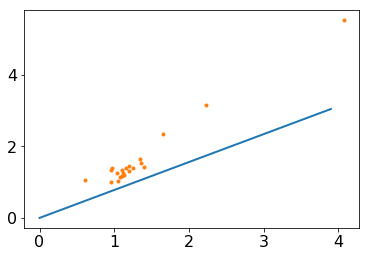

In [32]:
x_new = np.arange(0,4,0.1)
pred = ols.predict(x_new)
pl.plot(x_new,pred)
pl.plot(cntThPre,cntThPost,'.')

In [60]:
print 'Control --------->',spearmanr(cntThPre,cntThPost)
print len(cntThPre)
print 'Control --------->',spearmanr(cntThPre,cntThImm)
print len(cntThPre)
print 'Lesion --------->',spearmanr(lesThPre,lesThPost)
print len(lesThPre)
print 'Lesion --------->',spearmanr(lesThPre,lesThImm)
print len(lesThPre)

Control ---------> SpearmanrResult(correlation=0.84545454545454546, pvalue=1.3991106993623216e-06)
21
Control ---------> SpearmanrResult(correlation=0.51428571428571423, pvalue=0.01707135314181649)
21
Lesion ---------> SpearmanrResult(correlation=0.6692307692307693, pvalue=0.0002540133332153958)
25
Lesion ---------> SpearmanrResult(correlation=0.64307692307692299, pvalue=0.00052570013269132303)
25


In [33]:
spearmanr(shuffled_gammas[:,0],shuffled_gammas[:,1])

SpearmanrResult(correlation=0.37661572787767122, pvalue=0.0)

In [90]:
slopeDB = pd.DataFrame([],columns=['slope','group'])
for item in cntTh:
    gmm = pkl.load(open(item,'rb'))
    Lregress_imm = sm.OLS( gmm[1],gmm[0] ).fit()
    Lregress = sm.OLS( gmm[2],gmm[0] ).fit()
    slopeDB = slopeDB.append(pd.DataFrame([[Lregress_imm.params[0],'control_im']],columns=['slope','group']),ignore_index=True)
    slopeDB = slopeDB.append(pd.DataFrame([[Lregress.params[0],'control_po']],columns=['slope','group']),ignore_index=True)
for item in lesTh:
    gmm = pkl.load(open(item,'rb'))
    Lregress_imm = sm.OLS( gmm[1],gmm[0] ).fit()
    Lregress = sm.OLS( gmm[2],gmm[0] ).fit()
    slopeDB = slopeDB.append(pd.DataFrame([[Lregress_imm.params[0],'lesioned_im']],columns=['slope','group']),ignore_index=True)
    slopeDB = slopeDB.append(pd.DataFrame([[Lregress.params[0],'lesioned_po']],columns=['slope','group']),ignore_index=True)

In [68]:
print ranksums(slopeDB[slopeDB.group=='control_im'].slope,slopeDB[slopeDB.group=='lesioned_im'].slope)

RanksumsResult(statistic=0.73029674334022143, pvalue=0.46520881845214179)


In [69]:
print ranksums(slopeDB[slopeDB.group=='control_po'].slope,slopeDB[slopeDB.group=='lesioned_po'].slope)
slopeDB[slopeDB.group=='lesioned_po'].shape[0]+slopeDB[slopeDB.group=='control_po'].shape[0]

RanksumsResult(statistic=2.556038601690775, pvalue=0.010587137334056945)


11

In [70]:
slopeDB[slopeDB.group=='lesioned_im'].shape[0]+slopeDB[slopeDB.group=='control_im'].shape[0]

11

In [91]:
slopeDB_orig = pd.read_pickle('/mnt/sdb1/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/PCA_MEC/DATA/Slopes.db')
print ranksums(slopeDB[slopeDB.group=='control_po'].slope,slopeDB[slopeDB.group=='lesioned_po'].slope)
print slopeDB_orig[slopeDB_orig.group=='lesioned_po'].shape[0]
print slopeDB_orig[slopeDB_orig.group=='control_po'].shape[0]

RanksumsResult(statistic=2.556038601690775, pvalue=0.010587137334056945)
19
12


In [109]:
z_cnt_im = (slopeDB[slopeDB.group=='control_im'].slope)
print wilcoxon(z_cnt_im)
print 'Control ()--------->', wilcoxon(slopeDB[slopeDB.group=='control_po'].slope)
print wilcoxon(slopeDB[slopeDB.group=='control_po'].slope,slopeDB[slopeDB.group=='control_im'].slope)
print wilcoxon(slopeDB[slopeDB.group=='lesioned_po'].slope,slopeDB[slopeDB.group=='lesioned_im'].slope)
print 'Cont-Les._POST --------->', mannwhitneyu(slopeDB[slopeDB.group=='lesioned_po'].slope,slopeDB[slopeDB.group=='control_po'].slope)
print 'Cont-Les._POST --------->', mannwhitneyu(slopeDB_orig[slopeDB_orig.group=='lesioned_po'].slope,slopeDB_orig[slopeDB_orig.group=='control_po'].slope)
print '------------------------------------------------------------------'
print 'Cont-Les._IMM --------->', mannwhitneyu(slopeDB[slopeDB.group=='lesioned_im'].slope,slopeDB[slopeDB.group=='control_im'].slope)
print 'Cont-Les._IMM --------->', mannwhitneyu(slopeDB_orig[slopeDB_orig.group=='lesioned_im'].slope,slopeDB_orig[slopeDB_orig.group=='control_im'].slope)
print '------------------------------------------------------------------'
print 'Cont. POST_IMM --------->',ranksums(slopeDB[slopeDB.group=='control_po'].slope,slopeDB[slopeDB.group=='control_im'].slope)
print mannwhitneyu(slopeDB[slopeDB.group=='control_po'].slope,slopeDB[slopeDB.group=='control_im'].slope,use_continuity=True)

WilcoxonResult(statistic=0.0, pvalue=0.043114446783075355)
Control ()---------> WilcoxonResult(statistic=0.0, pvalue=0.043114446783075355)
WilcoxonResult(statistic=6.0, pvalue=0.68583043445160574)
WilcoxonResult(statistic=0.0, pvalue=0.027707849358079864)
Cont-Les._POST ---------> MannwhitneyuResult(statistic=1.0, pvalue=0.0068554150390666103)
Cont-Les._POST ---------> MannwhitneyuResult(statistic=35.0, pvalue=0.00072729088788739285)
------------------------------------------------------------------
Cont-Les._IMM ---------> MannwhitneyuResult(statistic=11.0, pvalue=0.2614083269595443)
Cont-Les._IMM ---------> MannwhitneyuResult(statistic=55.0, pvalue=0.0088343617397103891)
------------------------------------------------------------------
Cont. POST_IMM ---------> RanksumsResult(statistic=-0.73112615501393097, pvalue=0.46470209994046485)
MannwhitneyuResult(statistic=9.0, pvalue=0.26543465198425409)


In [88]:
print wilcoxon(slopeDB[slopeDB.group=='lesioned_im'].slope)
print wilcoxon(slopeDB[slopeDB.group=='lesioned_po'].slope)
print wilcoxon(slopeDB[slopeDB.group=='lesioned_po'].slope,slopeDB[slopeDB.group=='lesioned_im'].slope)

WilcoxonResult(statistic=0.0, pvalue=0.027707849358079864)
WilcoxonResult(statistic=0.0, pvalue=0.027707849358079864)
WilcoxonResult(statistic=0.0, pvalue=0.027707849358079864)


In [104]:
cnt_diff_Im = (cntThImm - cntThPre)/(cntThImm + cntThPre)*100
les_diff_Im = (lesThImm - lesThPre)/(lesThImm + lesThPre)*100
cnt_diff_Po = (cntThPost - cntThPre)/(cntThPost + cntThPre)*100
les_diff_Po = (lesThPost - lesThPre)/(lesThPost + lesThPre)*100
print wilcoxon(cnt_diff_Im)
print wilcoxon(les_diff_Im)
print cnt_diff_Im.size
print les_diff_Im.size

WilcoxonResult(statistic=16.0, pvalue=0.00054342184989428785)
WilcoxonResult(statistic=53.0, pvalue=0.0032159320975066147)
21
25


In [100]:
print ranksums(cnt_diff_Im,cnt_diff_Po)
print wilcoxon(les_diff_Im,les_diff_Po)

RanksumsResult(statistic=2.6287748488865055, pvalue=0.0085693076055389349)
WilcoxonResult(statistic=71.0, pvalue=0.013817143683192262)


In [106]:
print mannwhitneyu(cnt_diff_Im,les_diff_Im)
print mannwhitneyu(cnt_diff_Po,les_diff_Po)

MannwhitneyuResult(statistic=143.0, pvalue=0.0043417083252219992)
MannwhitneyuResult(statistic=133.0, pvalue=0.0022219652028425828)


In [54]:
import matplotlib.pyplot as pl

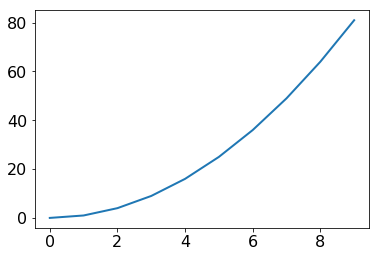

In [56]:
pl.plot(np.arange(10)**2)